Degree 2:
  Train R² Score: 0.5353036912571345
  Test R² Score: 0.5313479030089978
  Train MSE: 0.007498810374792284
  Test MSE: 0.00747981496395595

Degree 3:
  Train R² Score: 0.6882940478440766
  Test R² Score: 0.682833762103234
  Train MSE: 0.005030003001820127
  Test MSE: 0.0050620594413501386

Degree 4:
  Train R² Score: 0.6224836703321799
  Test R² Score: 0.6199681416519051
  Train MSE: 0.006091985919201725
  Test MSE: 0.006065411846234936

Degree 5:
  Train R² Score: 0.5646102999415489
  Test R² Score: 0.5637572860243651
  Train MSE: 0.007025889249493936
  Test MSE: 0.006962552394114983

Degree 6:
  Train R² Score: 0.5488538427724943
  Test R² Score: 0.5473301796966101
  Train MSE: 0.00728015140364988
  Test MSE: 0.007224733480071368

Degree 7:
  Train R² Score: 0.556788360843145
  Test R² Score: 0.5548554348481134
  Train MSE: 0.007152111982402625
  Test MSE: 0.007104628360620933

Degree 8:
  Train R² Score: 0.5024709991467173
  Test R² Score: 0.5011741500204501
  Train MSE: 0

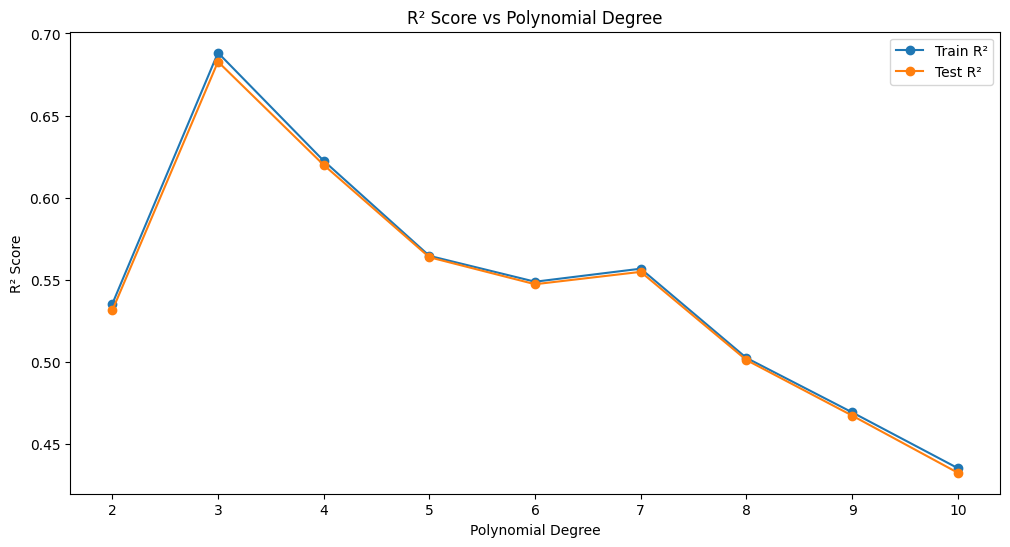

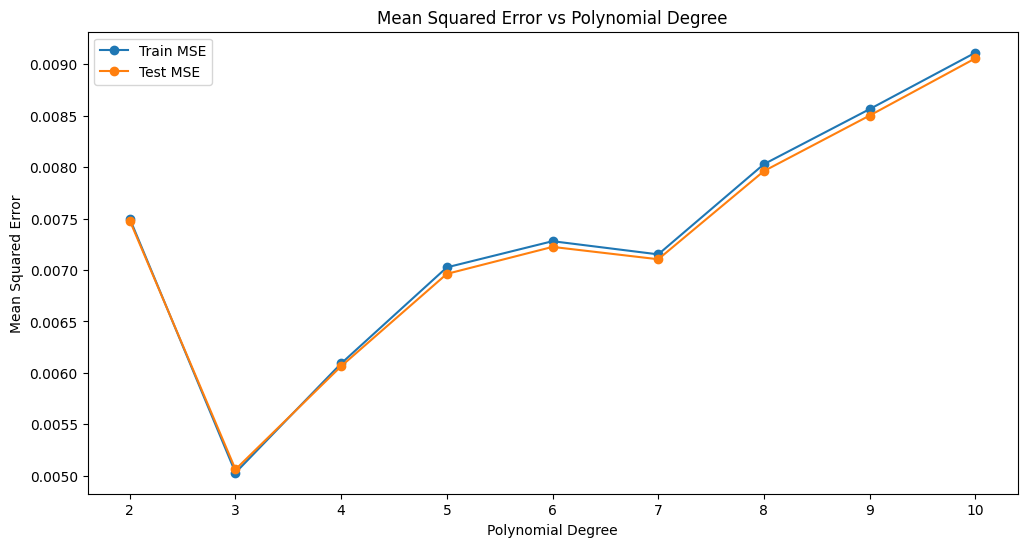

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('eurusd_hour.csv')

# Rename columns to more descriptive names
df.rename(columns={
    'BO': 'Opening bid price',
    'BH': 'Highest bid price',
    'BL': 'Lowest bid price',
    'BC': 'Closing bid price',
    'BCh': 'Change between bid open and close price',
    'AO': 'Opening ask price',
    'AH': 'Highest ask price',
    'AL': 'Lowest ask price',
    'AC': 'Closing ask price',
    'ACh': 'Change between ask open and close price'
}, inplace=True)

# Combine Date and Time into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Convert the datetime column to a numeric format (e.g., timestamp)
df['Timestamp'] = df['Datetime'].astype('int64') // 10**9  # Convert to seconds since epoch

# Alternatively, you could calculate the minutes since the start of the data
df['Minutes_Since_Start'] = (df['Datetime'] - df['Datetime'].min()).dt.total_seconds() / 60

# Drop the original Date and Time columns
df = df.drop(columns=['Date', 'Time', 'Datetime'])

# Feature selection
x1 = df[['Minutes_Since_Start']]
y1 = df[['Opening bid price']]

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

# Evaluate multiple polynomial degrees
degrees = list(range(2, 11))
train_r2_scores = []
test_r2_scores = []
train_mse_scores = []
test_mse_scores = []

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)

    # Fit the model
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # Predict using the model
    y_train_pred = model.predict(x_train_poly)
    y_test_pred = model.predict(x_test_poly)

    # Calculate R² and MSE for training and testing data
    train_r2_scores.append(r2_score(y_train, y_train_pred))
    test_r2_scores.append(r2_score(y_test, y_test_pred))
    train_mse_scores.append(mean_squared_error(y_train, y_train_pred))
    test_mse_scores.append(mean_squared_error(y_test, y_test_pred))

# Display results for each degree
for i, degree in enumerate(degrees):
    print(f"Degree {degree}:")
    print(f"  Train R² Score: {train_r2_scores[i]}")
    print(f"  Test R² Score: {test_r2_scores[i]}")
    print(f"  Train MSE: {train_mse_scores[i]}")
    print(f"  Test MSE: {test_mse_scores[i]}")
    print()

# Plotting R² Scores for comparison
plt.figure(figsize=(12, 6))
plt.plot(degrees, train_r2_scores, label='Train R²', marker='o')
plt.plot(degrees, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² Score vs Polynomial Degree')
plt.legend()
plt.show()

# Plotting MSE for comparison
plt.figure(figsize=(12, 6))
plt.plot(degrees, train_mse_scores, label='Train MSE', marker='o')
plt.plot(degrees, test_mse_scores, label='Test MSE', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs Polynomial Degree')
plt.legend()
plt.show()
